<a href="https://colab.research.google.com/github/mapbefun/mapbefun/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 3

In [18]:
# prompt: 구글드라이브에 있는 파일을 불러오는 코드

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
file_path = '/content/drive/My Drive/dataset/bank-additional-full.csv'

In [21]:
df = pd.read_csv(file_path, sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [22]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 59)"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 59)"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[30, 39)"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[40, 49)"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"[50, 59)"


In [46]:
df[['y','conversion']]

,y,conversion
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
...,...,...
41183,yes,1
41184,no,0
41185,no,0
41186,yes,1


In [ ]:
df.shape

In [44]:
df.conversion.sum()  # 또는 df['conversion'].sum()

np.int64(4640)

In [43]:
print('%i명 중 %i명이 전환' % (df.shape[0], df.conversion.sum()))
print('전환율: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

41188명 중 4640명이 전환
전환율: 11.27%


In [42]:
conversions_by_age = (df.groupby(by='age')['conversion'].sum() /
                      df.groupby(by='age')['conversion'].count() * 100.0)

In [41]:
conversions_by_age

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


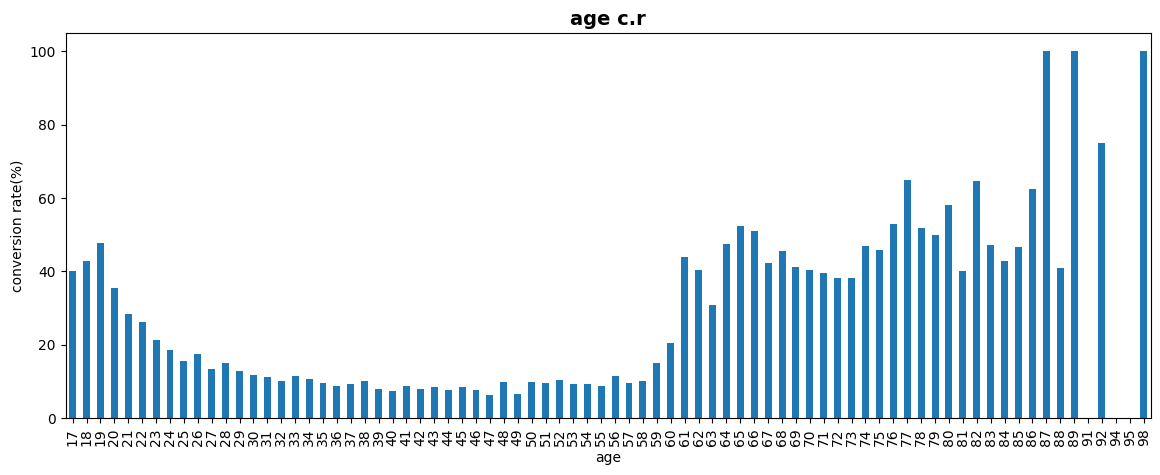

In [40]:
ax = conversions_by_age.plot(kind='bar', figsize=(14, 5))
plt.xlabel('age')
plt.ylabel('conversion rate(%)')
plt.title('age c.r', fontsize=14, fontweight='bold')
plt.show()

In [52]:
df['age_group'] = df['age'].apply(lambda x:
                                  '[17, 30)' if 17 <= x < 30 else
                                  '[30, 40)' if 30 <= x < 40 else
                                  '[40, 50)' if 40 <= x < 50 else
                                  '[50, 60)' if 50 <= x < 60 else
                                  '[60, 70)' if 60 <= x < 70 else
                                  '[70, 98]' if 70 <= x <= 98 else
                                  '기타')


위 코딩에서 `lambda` 사용법은 아래 [부록](#부록:-lambda-사용법)에 몇 가지 사용 예시가 나와 있다.

In [53]:
conversions_by_age_group = (df.groupby(by='age_group')['conversion'].sum() /
                            df.groupby(by='age_group')['conversion'].count() * 100.0)
conversions_by_age_group

,conversion
age_group,
"[17, 30)",16.263891
"[30, 40)",10.125162
"[40, 50)",7.923238
"[50, 60)",10.157389
"[60, 70)",34.668508
"[70, 98]",47.121535


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

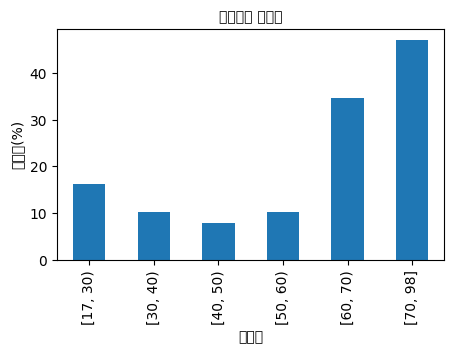

In [54]:
ax = conversions_by_age_group.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', figsize=(5,3))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 전환율', fontsize=10, fontweight='bold')
plt.show()

In [57]:
pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [61]:
df.groupby(['marital','conversion'])['conversion'].count().unstack('conversion')

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [62]:
# 결혼상태별 전환율
marital_conversion_df = pd.pivot_table(df, values='y', index='marital',
    columns='conversion', aggfunc=len)  # 위에서 만든 피벗 테이블
marital_conversion_df = marital_conversion_df.divide(
    df.groupby(by='marital')['conversion'].count(), axis=0)*100.0
marital_conversion_df

conversion,0,1
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


In [63]:
age_marital_df = df.groupby(['age_group', 'marital'])\
['conversion'].sum().unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0
"[70, 98]",64.0,151.0,6.0,0.0


In [64]:
age_marital_df = age_marital_df.divide(
    df.groupby(by='age_group')['conversion'].count(), axis=0)*100.0
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",0.211678,2.787088,13.247486,0.017640
"[30, 40)",0.755697,5.295785,4.038257,0.035423
"[40, 50)",1.197036,5.462664,1.235037,0.028501
"[50, 60)",1.734188,7.767415,0.641212,0.014573
"[60, 70)",3.729282,30.110497,0.690608,0.138122
"[70, 98]",13.646055,32.196162,1.279318,0.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

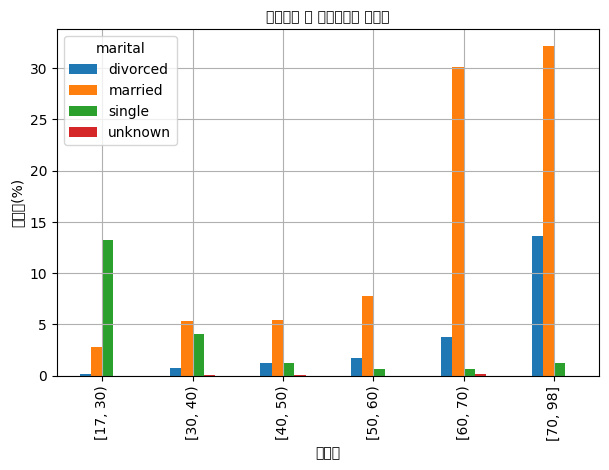

In [65]:
ax = age_marital_df.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', grid=True, figsize=(7,4.5))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 및 결혼유형별 전환율', fontsize=10, fontweight='bold')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54872 (\N{HANGUL SYLLABLE HWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

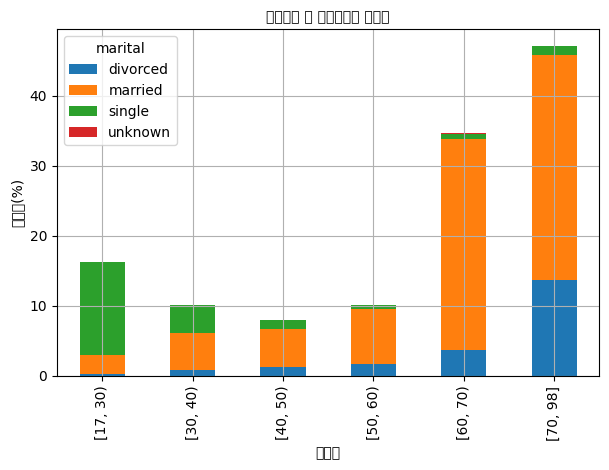

In [66]:
ax = age_marital_df.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', stacked=True, grid=True, figsize=(7,4.5))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 및 결혼유형별 전환율', fontsize=10, fontweight='bold')
plt.show()

In [ ]:
# lambda 문장 자체를 함수로 사용하는 경우
(lambda n,m: n+m)(2,3)

In [ ]:
# lambda를 변수에 할당하여 재사용하는 경우
x = lambda a: a + 10
x(5)

In [ ]:
# lambda 식 안에서 조건문 사용 가능
(lambda n,m: n if n%2==0 else m)(1,3)